# ANALIZA IZPOSOJE KNJIG

## PREDPRIPRAVA

Če datoteka podatki.csv še ne obstaja, jo ustvarimo s pomočjo skripte zajem_podatkov.py.

In [1]:
%matplotlib inline

import csv
import os
import requests
import sys
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = 16
tabela = pd.read_csv('../podatki.csv', encoding='utf 8')

In [3]:
import matplotlib.pyplot as plt

Predstavimo tabelo pridobljenih podatkov:

In [4]:
tabela

,naslov,avtor,izposoja,rezervacija,leto,mesec
0,Viharno nebo,"Wooding, Chris",1216,241,2002,1
1,Romeo in Julija,"Shakespeare, William",1151,773,2002,1
2,"Harry Potter, Jetnik iz Azkabana","Rowling, J. K.",1003,542,2002,1
3,"Harry Potter, Dvorana skrivnosti","Rowling, J. K.",956,633,2002,1
4,Od Ivana Preglja do Cirila KosmaÄa : izbor novel,,944,409,2002,1
5,Antigona,Sophocles,929,821,2002,1
6,"Harry Potter, Kamen modrosti","Rowling, J. K.",916,866,2002,1
7,Gospodar prstanov,"Tolkien, J. R. R.",912,1246,2002,1
8,"Harry Potter, Ognjeni kelih","Rowling, J. K.",813,715,2002,1
9,ResniÄna mladost,,759,238,2002,1


## ANALIZA

### NAJBOLJ IZPOSOJANI AVTORJI:

Predstavimo 20 najbolj izposojanih avtorjev:

In [5]:
pojavitve_avtorjev = tabela[['avtor','izposoja']].groupby('avtor').sum().sort_values('izposoja', ascending=False).unstack()

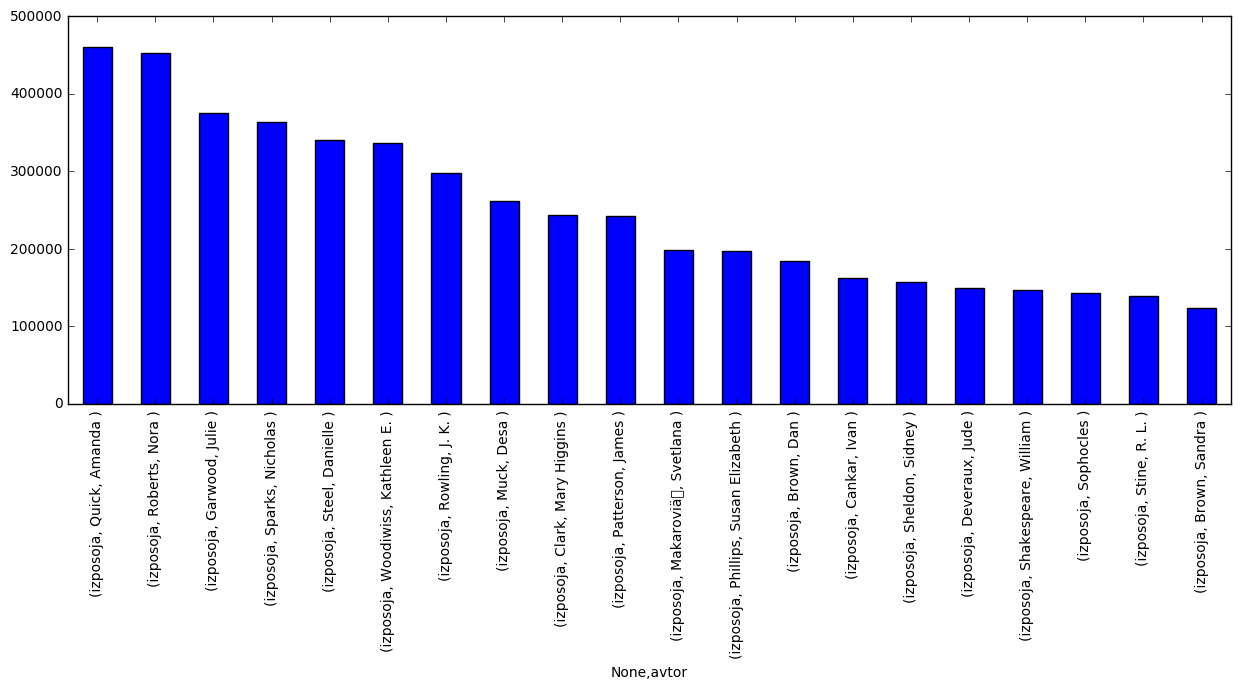

In [6]:
pojavitve_avtorjev[1:21].plot(kind='bar', style = 'seaborn-deep')

### NAJBOLJ IZPOSOJANE KNJIGE

In [7]:
pojavitve_naslovov = tabela[['naslov','izposoja']].groupby('naslov').sum().sort_values('izposoja', ascending=False).unstack()

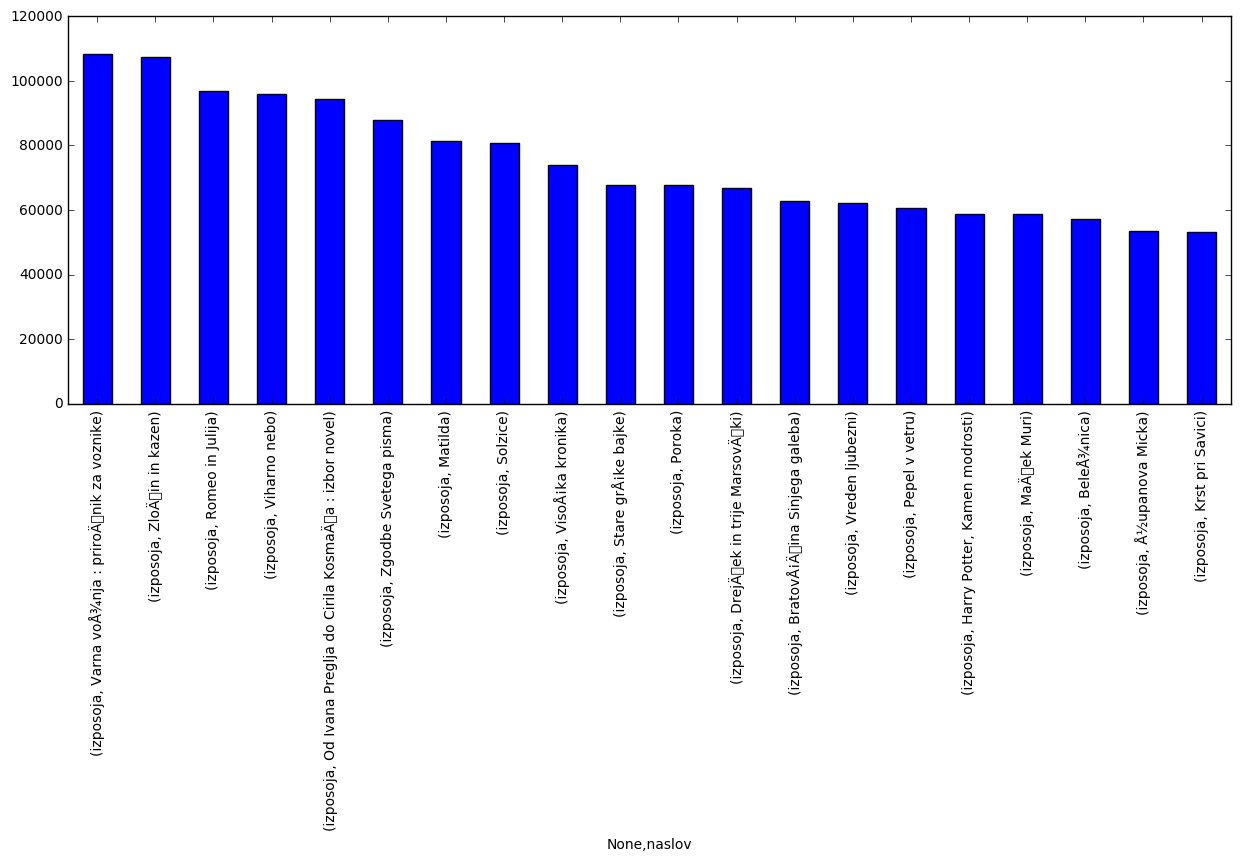

In [8]:
pojavitve_naslovov[1:21].plot(kind='bar', style = 'seaborn-deep')

Opazimo, da je več kot polovica (13 od 20) najbolj izposojanih knjig domače branje v osnovni ali srednji šoli. 

### IZPOSOJA PREKO LETA

Opazujmo še povprečno izposojo tekom leta: 

In [9]:
izposoja_po_mesecih = tabela[['mesec','izposoja', 'rezervacija']].groupby('mesec').mean()

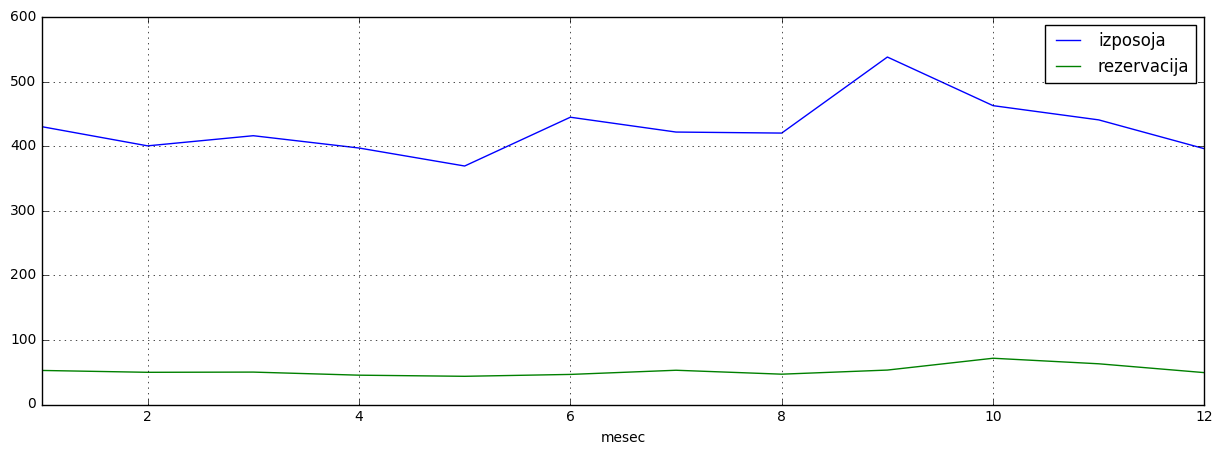

In [10]:
izposoja_po_mesecih.plot(grid = True)

Iz grafa je razvidno, da so največje uspešnice najbolj brane med septembrom in novembrom, najmanj pa si knjige izposojamo maja.

### IZPOSOJA SKOZI ČAS

Kaj pa se dogaja z izposojo knjig skozi leta? Ali izposoja od leta 2002 narašča ali pada?

In [11]:
izposoja_letno = tabela[['leto','izposoja', 'rezervacija']].groupby('leto').mean()

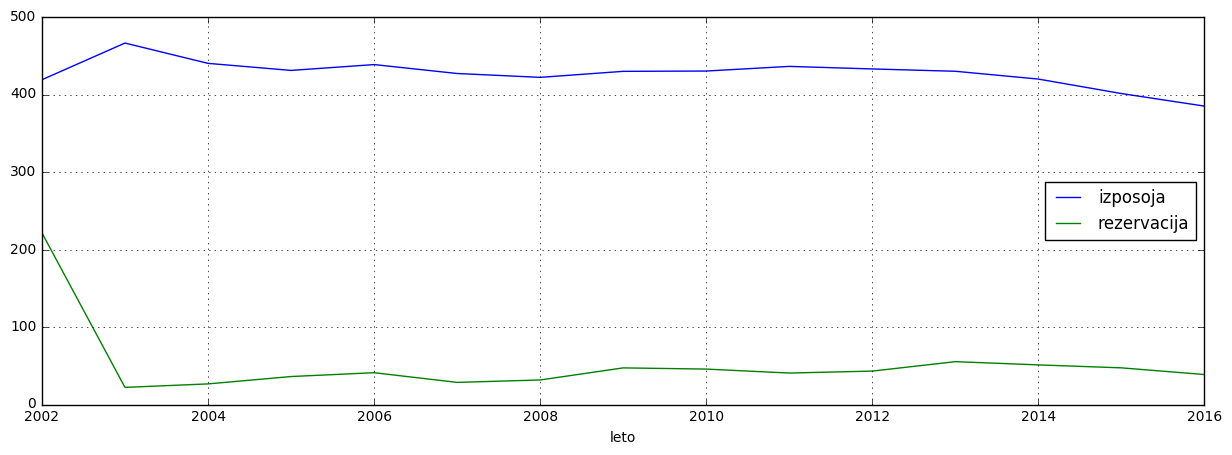

In [12]:
izposoja_letno.plot(grid = True)

Ker za leto 2016 manjkajo podatki za oktober, november in december, smo uporabili povprečno izposojo. Graf kaže, da povprečna izposoja rahlo pada. 
Sedaj nas zanima, koliko izposoja pada in ali so knjižnice ogrožene. Zamislimo si, da bodo knjižnice nehale obratovati, ko bo povprečna izposoja najbolj izposojanih knjig padla za približno polovico (torej na 200 izposoj na mesec). Kdaj se bo (če upoštevamo dosedanje podatke) to zgodilo?

Iščemo torej linearno funkcijo (y = a + bx), ki bo najbolje opisovala dosedanje dogajanje. 

Uporabimo linearno regresijo:

In [13]:
izposoja_letno = tabela[['leto','izposoja']].groupby('leto').mean()

In [14]:
vsota_produktov = sum(izposoja_letno['izposoja']*tabela['leto'].unique())

In [15]:
n = len(izposoja_letno['izposoja'])

In [16]:
produkt_vsot = sum(izposoja_letno['izposoja'])*sum(tabela['leto'].unique())

In [17]:
vsota_kvadratov = sum(tabela['leto'].unique() * tabela['leto'].unique())

In [18]:
x = sum(tabela['leto'].unique())

In [19]:
kvadrat_vsote = x*x

In [20]:
b = (vsota_produktov - (1/n) * produkt_vsot)/(vsota_kvadratov - (1/n) * kvadrat_vsote)

In [21]:
a = izposoja_letno['izposoja'].mean() - b * tabela['leto'].unique().mean()

In [22]:
fit = b*tabela['leto'].unique()+a

In [23]:
izposoja_letno['napoved'] = fit 

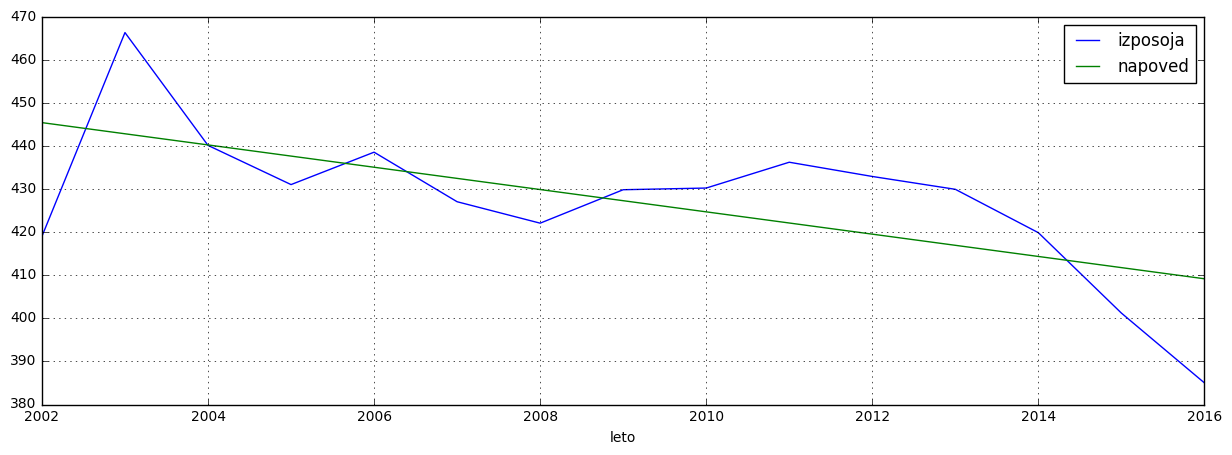

In [24]:
izposoja_letno.plot(grid = True)

Našli smo linearno funkcijo, ki najbolje opiše dosedanje dogajanje. Sedaj poiščimo, kdaj bo padla pod 200 izposoj povprečno na mesec. 

In [25]:
konec_knjiznic = (200 - a) / b

In [26]:
konec_knjiznic

2096.7599645362588

Če se bo današnji trend izposoje nadaljeval, bo izposoja (najbolj branih knjig) do leta 2097 padla za polovico. Seveda pa ne moremo posplošiti, da slovenci vedno manj beremo, saj ne smemo pozabiti na elektronske knjige in ostale elektronske oblike branja, pa tudi na knjigarne. 
Če bi želeli bolj natančno in zanesljivejšo napoved, bi potrebovali podatke več kot 200 najbolj izposojanih knjig na mesec (vzorec je precej slab, saj vemo samo, kaj se dogaja z najbolj izposojanimi knjigami, ne pa tudi, koliko različnih knjig si bralci izposojajo).